In [76]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
tf.__version__

'2.17.0'

## Carregando da rede neural convulocional pré treinada

In [77]:
network = tf.keras.applications.VGG19(include_top=False, weights='imagenet')

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [78]:
network.summary()

Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, None, None, 64)      │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, None, None, 64)      │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, None, None, 64)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, None, None, 128)     │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, None, None, 128)     │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, None, None, 128)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, None, None, 256)     │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, None, None, 256)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, None, None, 512)     │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, None, None, 512)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 20,024,384 (76.39 MB)

 Non-trainable params: 0 (0.00 B)

## Carregamento e pré-processamento das imagens

#### Imagem de conteúdo

In [79]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [167]:
imagem_conteudo = tf.keras.preprocessing.image.load_img('/content/drive/MyDrive/COMPUTER-VISION/acaua.png')

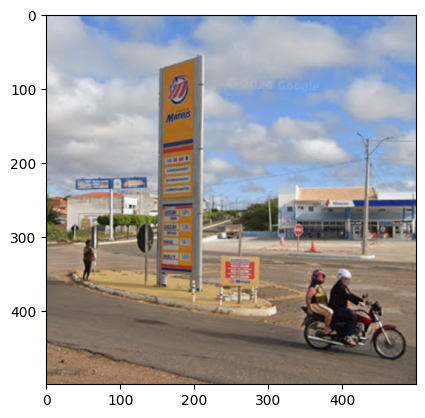

In [168]:
plt.imshow(imagem_conteudo)

In [169]:
type(imagem_conteudo)

PIL.Image.Image

In [170]:
# para ir pro tensor flow, deve converter para outro formato
imagem_conteudo = tf.keras.preprocessing.image.img_to_array(imagem_conteudo)

In [171]:
type(imagem_conteudo)

numpy.ndarray

In [172]:
imagem_conteudo.min(), imagem_conteudo.max()



(0.0, 249.0)

In [173]:
imagem_conteudo = imagem_conteudo / 255

In [174]:
imagem_conteudo.min(), imagem_conteudo.max()


(0.0, 0.9764706)

In [175]:
imagem_conteudo = imagem_conteudo[tf.newaxis, :]
imagem_conteudo.shape

(1, 500, 500, 3)

#### Imagem de estilo

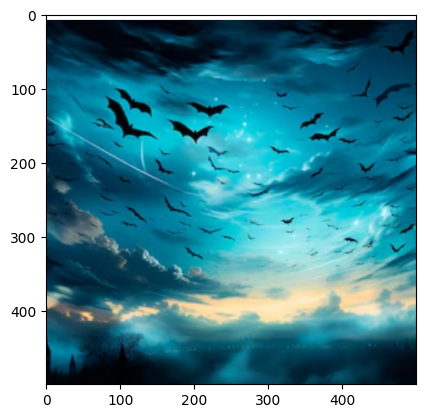

In [177]:
imagem_estilo = tf.keras.preprocessing.image.load_img("/content/drive/MyDrive/COMPUTER-VISION/trevas.png")
plt.imshow(imagem_estilo);

In [178]:
imagem_estilo = tf.keras.preprocessing.image.img_to_array(imagem_estilo)

In [179]:
imagem_estilo = imagem_estilo / 255
imagem_estilo = imagem_estilo[tf.newaxis, :]
imagem_estilo.shape

(1, 500, 500, 3)

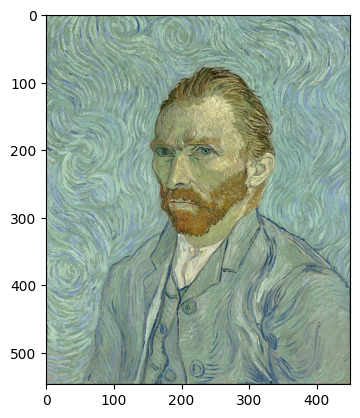

In [91]:
imagem_estilo = tf.keras.preprocessing.image.load_img('/content/drive/MyDrive/COMPUTER-VISION/Visão Computacional Guia Completo-20240913T001209Z-001/Visão Computacional Guia Completo/Images/vangogh.jpg')
plt.imshow(imagem_estilo);

In [92]:
imagem_estilo = tf.keras.preprocessing.image.img_to_array(imagem_estilo)
imagem_estilo = imagem_estilo / 255
imagem_estilo = imagem_estilo[tf.newaxis, :]
imagem_estilo.shape

(1, 547, 450, 3)

## Contrução da Rede Neural

In [180]:
camadas_conteudo = ['block4_conv2']
camadas_estilo = ['block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1', 'block5_conv1']

In [181]:
numero_camadas_conteudo = len(camadas_conteudo)
numero_camadas_estilo = len(camadas_estilo)
print(numero_camadas_conteudo, numero_camadas_estilo)

1 5


In [182]:
network.get_layer('block1_conv1').output

<KerasTensor shape=(None, None, None, 64), dtype=float32, sparse=False, name=keras_tensor_96>

In [183]:
network.input

<KerasTensor shape=(None, None, None, 3), dtype=float32, sparse=None, name=keras_tensor_95>

In [184]:
for nome in camadas_estilo:
  print(nome)

block1_conv1
block2_conv1
block3_conv1
block4_conv1
block5_conv1


In [185]:
def vgg_camadas(nome_camadas):
  vgg = tf.keras.applications.VGG19(include_top=False, weights='imagenet')
  vgg.trainable = False
  outputs = [vgg.get_layer(nome).output for nome in nome_camadas]
  network = tf.keras.Model(inputs = [vgg.input], outputs = outputs)
  return network

In [186]:
extrator_estilo = vgg_camadas(camadas_estilo)

In [187]:
extrator_estilo.summary()

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)          │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, None, None, 64)      │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, None, None, 64)      │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, None, None, 64)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, None, None, 128)     │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, None, None, 128)     │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, None, None, 128)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, None, None, 256)     │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, None, None, 256)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, None, None, 512)     │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, None, None, 512)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,944,960 (49.38 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 12,944,960 (49.38 MB)

In [188]:
extrator_estilo.outputs

[<KerasTensor shape=(None, None, None, 64), dtype=float32, sparse=False, name=keras_tensor_250>,
 <KerasTensor shape=(None, None, None, 128), dtype=float32, sparse=False, name=keras_tensor_253>,
 <KerasTensor shape=(None, None, None, 256), dtype=float32, sparse=False, name=keras_tensor_256>,
 <KerasTensor shape=(None, None, None, 512), dtype=float32, sparse=False, name=keras_tensor_261>,
 <KerasTensor shape=(None, None, None, 512), dtype=float32, sparse=False, name=keras_tensor_266>]

In [189]:
saidas_estilo = extrator_estilo(imagem_estilo)

In [149]:
saidas_estilo[1]

<tf.Tensor: shape=(1, 280, 300, 128), dtype=float32, numpy=
array([[[[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          7.1450973e+00, 0.0000000e+00, 1.2458384e+01],
         [0.0000000e+00, 0.0000000e+00, 1.6780976e+00, ...,
          2.6414452e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 1.1416008e+00, ...,
          5.3857517e+00, 0.0000000e+00, 1.1649473e+00],
         ...,
         [0.0000000e+00, 0.0000000e+00, 1.7971717e+00, ...,
          5.8314385e+00, 0.0000000e+00, 1.2675031e+00],
         [0.0000000e+00, 0.0000000e+00, 2.0207417e+00, ...,
          6.5748863e+00, 0.0000000e+00, 2.6461122e+00],
         [0.0000000e+00, 0.0000000e+00, 7.9473057e+00, ...,
          1.3143223e+01, 0.0000000e+00, 0.0000000e+00]],

        [[0.0000000e+00, 4.9902215e+00, 0.0000000e+00, ...,
          7.3128715e+00, 5.7628453e-01, 1.3347644e+01],
         [0.0000000e+00, 5.0576649e+00, 7.9425991e-02, ...,
          0.0000000e+00, 3.5877293e-01, 0.0000000e+0

In [190]:
# https://www.tensorflow.org/api_docs/python/tf/einsum
def gram_matrix(ativacoes):
  resultado = tf.linalg.einsum('bijc,bijd->bcd', ativacoes, ativacoes)
  input_shape = tf.shape(ativacoes)
  num_locations = tf.cast(input_shape[1] * input_shape[2], tf.float32)
  return resultado / num_locations

In [191]:
saidas_estilo[0]

<tf.Tensor: shape=(1, 500, 500, 64), dtype=float32, numpy=
array([[[[0.        , 0.29125345, 0.20434734, ..., 0.04168189,
          0.7106071 , 0.23109871],
         [0.        , 0.46357232, 0.6799367 , ..., 0.        ,
          2.2285542 , 1.7026076 ],
         [0.        , 0.46357232, 0.6799367 , ..., 0.        ,
          2.2285542 , 1.7026076 ],
         ...,
         [0.        , 0.46357232, 0.6799367 , ..., 0.        ,
          2.2285542 , 1.7026076 ],
         [0.        , 0.46357232, 0.6799367 , ..., 0.        ,
          2.2285542 , 1.7026076 ],
         [0.7655413 , 0.57919466, 1.0675534 , ..., 0.15326566,
          3.3392513 , 3.227657  ]],

        [[0.        , 0.34103358, 0.03216061, ..., 0.        ,
          0.        , 0.        ],
         [0.72687244, 0.55834335, 0.5916322 , ..., 0.        ,
          0.49078763, 0.7324457 ],
         [0.72687244, 0.55834335, 0.5916322 , ..., 0.        ,
          0.49078763, 0.7324457 ],
         ...,
         [0.72687244, 0.55834

In [192]:
gram_matrix(saidas_estilo[0])

<tf.Tensor: shape=(1, 64, 64), dtype=float32, numpy=
array([[[0.5727003 , 0.04797271, 0.15926795, ..., 0.23890829,
         0.34916306, 0.43719596],
        [0.04797271, 0.03030274, 0.03225096, ..., 0.00211385,
         0.03221324, 0.04230978],
        [0.15926795, 0.03225096, 0.07053419, ..., 0.02788828,
         0.10744257, 0.14088689],
        ...,
        [0.23890829, 0.00211385, 0.02788828, ..., 0.21995756,
         0.1574036 , 0.16613959],
        [0.34916306, 0.03221324, 0.10744257, ..., 0.1574036 ,
         0.25041658, 0.29769778],
        [0.43719596, 0.04230978, 0.14088689, ..., 0.16613959,
         0.29769778, 0.36813322]]], dtype=float32)>

In [193]:
class StyleContentModel(tf.keras.models.Model):
  def __init__(self, camadas_estilo, camadas_conteudo):
    super().__init__()
    self.vgg = vgg_camadas(camadas_estilo + camadas_conteudo)
    self.camadas_estilo = camadas_estilo
    self.camadas_conteudo = camadas_conteudo
    self.numero_camadas_estilo = len(camadas_estilo)
    self.vgg.trainable = False

  def call(self, imagem):
    imagem = imagem * 255.0
    # 0 - 1
    # -127.50 - 127.50
    imagem_preprocessada = tf.keras.applications.vgg19.preprocess_input(imagem)
    outputs = self.vgg(imagem_preprocessada)
    saidas_estilo = outputs[:self.numero_camadas_estilo] # 0-4
    saidas_conteudo = outputs[self.numero_camadas_estilo:] # 5:

    saidas_estilo = [gram_matrix(camada) for camada in saidas_estilo]

    conteudo_dict = {nome_conteudo: valor for nome_conteudo, valor in zip(self.camadas_conteudo, saidas_conteudo)}
    estilo_dict = {nome_estilo: valor for nome_estilo, valor in zip(self.camadas_estilo, saidas_estilo)}

    return {'conteudo': conteudo_dict, 'estilo': estilo_dict}

In [194]:
camadas_estilo, camadas_conteudo

(['block1_conv1',
  'block2_conv1',
  'block3_conv1',
  'block4_conv1',
  'block5_conv1'],
 ['block4_conv2'])

In [195]:
extrator = StyleContentModel(camadas_estilo, camadas_conteudo)

In [196]:
resultados = extrator(imagem_conteudo)

In [197]:
resultados

{'conteudo': {'block4_conv2': <tf.Tensor: shape=(1, 62, 62, 512), dtype=float32, numpy=
  array([[[[ 342.63943 ,    0.      ,  132.92018 , ...,  455.66296 ,
             338.17944 ,    0.      ],
           [   0.      ,    0.      ,  313.32306 , ...,  117.80163 ,
             340.64822 ,    0.      ],
           [   0.      ,    0.      ,  379.5574  , ...,  166.87885 ,
             326.1308  ,    0.      ],
           ...,
           [   0.      ,    0.      ,    0.      , ...,  596.3253  ,
             231.02605 ,    0.      ],
           [   0.      ,    0.      ,  167.67123 , ...,  501.21902 ,
              49.645184,    0.      ],
           [   0.      ,    0.      ,  313.70886 , ...,  506.79776 ,
              40.593624,    0.      ]],
  
          [[   0.      ,    0.      ,   18.889557, ...,  620.24023 ,
             193.16159 ,    0.      ],
           [   0.      ,    0.      ,  379.9458  , ...,  154.96027 ,
               0.      ,    0.      ],
           [   0.      ,    

In [198]:
for chave, valor in resultados.items():
  print(chave, valor.keys())

conteudo dict_keys(['block4_conv2'])
estilo dict_keys(['block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1', 'block5_conv1'])


In [199]:
estilo_objetivo = extrator(imagem_estilo)['estilo']
conteudo_objetivo = extrator(imagem_conteudo)['conteudo']

In [200]:
len(estilo_objetivo), len(conteudo_objetivo)

(5, 1)

In [201]:
nova_imagem = tf.Variable(imagem_conteudo)

In [202]:
peso_conteudo = 1
peso_estilo = 1000

In [203]:
optimizer = tf.optimizers.Adam(learning_rate=0.02)

## Treinamento

In [204]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

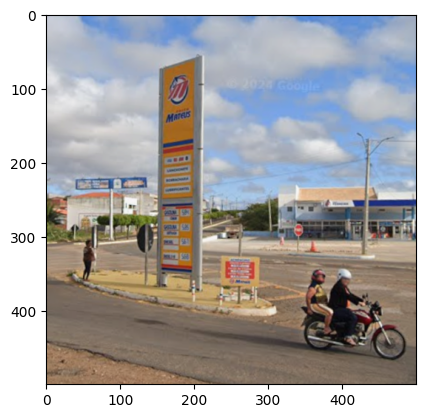

In [205]:
plt.imshow(tf.squeeze(imagem_conteudo, axis=0))

In [206]:
epocas = 3000
impressao = 500

for epoca in range(epocas):
  with tf.GradientTape() as tape:
    outputs = extrator(nova_imagem)

    saidas_conteudo = outputs['conteudo']
    saidas_estilo = outputs['estilo']

    conteudo_loss = tf.add_n([tf.reduce_mean((saidas_conteudo[nome] - conteudo_objetivo[nome]) ** 2) for nome in saidas_conteudo.keys()])
    estilo_loss = tf.add_n([tf.reduce_mean((saidas_estilo[nome] - estilo_objetivo[nome]) ** 2) for nome in saidas_estilo.keys()])
    total_loss = conteudo_loss * peso_conteudo / numero_camadas_conteudo + estilo_loss * peso_estilo / numero_camadas_estilo

  gradiente = tape.gradient(total_loss, nova_imagem)
  optimizer.apply_gradients([(gradiente, nova_imagem)])
  nova_imagem.assign(tf.clip_by_value(nova_imagem, 0.0, 1.0))

  if (epoca + 1) % impressao == 0:
    print('Época: ', epoca + 1, ' Conteúdo loss: ', conteudo_loss, ' Estilo loss: ', estilo_loss, ' Total loss: ', total_loss)
    plt.imshow(tf.squeeze(nova_imagem, axis=0));
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

## Visualizando Resultados

In [207]:
figura, (eixo1, eixo2, eixo3) = plt.subplots(1, 3, figsize=(30,8))
eixo1.imshow(tf.squeeze(imagem_conteudo, axis = 0))
eixo1.set_title('Imagem de conteúdo')
plt.axis('off')
eixo2.imshow(tf.squeeze(nova_imagem, axis = 0))
eixo2.set_title('Nova imagem')
plt.axis('off')
eixo3.imshow(tf.squeeze(imagem_estilo, axis = 0))
eixo3.set_title('Imagem de estilo')
plt.axis('off');

Output hidden; open in https://colab.research.google.com to view.